In [1]:
# for Google Colaboratory
# ! bash setup.sh

In [2]:
# load modules
from rdflib import (
  Graph,
)
import pandas

import json
import sys

sys.path.append('../src/')

In [3]:
knowledge_graph_dir = '../KnowledgeGraph/'
additional_knowledge_graph_dir = '../AdditionalKnowledgeGraph/'

# Knowledge Graphの確認

In [4]:
# load knowledge graph
g = Graph()
g.parse(f'{knowledge_graph_dir}/SpeckledBand_mod.ttl')

<Graph identifier=Nc95cdb04756940acba5f5bc9474c369b (<class 'rdflib.graph.Graph'>)>

In [5]:
# show prefixes
for prefix, uri in g.namespaces():
  print(f'{prefix}: {uri}')

xml: http://www.w3.org/XML/1998/namespace
rdf: http://www.w3.org/1999/02/22-rdf-syntax-ns#
rdfs: http://www.w3.org/2000/01/rdf-schema#
xsd: http://www.w3.org/2001/XMLSchema#
owl: http://www.w3.org/2002/07/owl#
cc: http://creativecommons.org/ns#
kgc: http://kgc.knowledge-graph.jp/ontology/kgc.owl#
kd: http://kgc.knowledge-graph.jp/data/SpeckledBand/


## Sceneを表示する

In [6]:
# SPARQL query
query = '''
  PREFIX kd:<http://kgc.knowledge-graph.jp/data/SpeckledBand/>
  SELECT DISTINCT ?predicate ?object {
    kd:1 ?predicate ?object.
  }
'''

In [7]:
# queryを実行
res = g.query(query)

# 結果を表示
print(f'vars: {res.vars}')
for b in res.bindings:
  print(f'b: {b}')


vars: [rdflib.term.Variable('predicate'), rdflib.term.Variable('object')]
b: {rdflib.term.Variable('predicate'): rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.Variable('object'): rdflib.term.URIRef('http://kgc.knowledge-graph.jp/ontology/kgc.owl#Situation')}
b: {rdflib.term.Variable('predicate'): rdflib.term.URIRef('http://kgc.knowledge-graph.jp/ontology/kgc.owl#source'), rdflib.term.Variable('object'): rdflib.term.Literal('ヘレンがホームズの家にやってくる', lang='ja')}
b: {rdflib.term.Variable('predicate'): rdflib.term.URIRef('http://kgc.knowledge-graph.jp/ontology/kgc.owl#source'), rdflib.term.Variable('object'): rdflib.term.Literal("Helen comes to Holmes' house", lang='en')}
b: {rdflib.term.Variable('predicate'): rdflib.term.URIRef('http://kgc.knowledge-graph.jp/ontology/kgc.owl#hasPredicate'), rdflib.term.Variable('object'): rdflib.term.URIRef('http://kgc.knowledge-graph.jp/data/SpeckledBand/come')}
b: {rdflib.term.Variable('predicate'): rdflib.term.URIRef('htt

In [8]:
# prefixを使って表現する
b['predicate'].n3(g.namespace_manager)

'kgc:to'

In [9]:
print('\t| '.join(res.vars))
print('-'*100)
for p, o in res:
  print(f'{p.n3(g.namespace_manager)} \t| {o.n3(g.namespace_manager)}')


predicate	| object
----------------------------------------------------------------------------------------------------
rdf:type 	| kgc:Situation
kgc:source 	| "ヘレンがホームズの家にやってくる"@ja
kgc:source 	| "Helen comes to Holmes' house"@en
kgc:hasPredicate 	| kd:come
kgc:subject 	| kd:Helen
kgc:to 	| kd:house_of_Holmes


In [10]:
# pandas.DataFrame を使って表示
from utils import pretty_print
pretty_print(res, g.namespace_manager)

,predicate,object
0,rdf:type,kgc:Situation
1,kgc:source,"""ヘレンがホームズの家にやってくる""@ja"
2,kgc:source,"""Helen comes to Holmes' house""@en"
3,kgc:hasPredicate,kd:come
4,kgc:subject,kd:Helen
5,kgc:to,kd:house_of_Holmes


In [11]:
# シーンを確認するための関数を作成
from utils import create_print_scene
print_scene = create_print_scene(g)
print_scene('kd:1')
print_scene('kd:100')

,predicate,object
0,rdf:type,kgc:Situation
1,kgc:source,"""ヘレンがホームズの家にやってくる""@ja"
2,kgc:source,"""Helen comes to Holmes' house""@en"
3,kgc:hasPredicate,kd:come
4,kgc:subject,kd:Helen
5,kgc:to,kd:house_of_Holmes


,predicate,object
0,rdf:type,kgc:Situation
1,kgc:source,"""ジュリアの部屋の床はしっかり堅い。""@ja"
2,kgc:source,"""bedroom of Julia's floor is tight.""@en"
3,kgc:hasProperty,kd:hard
4,kgc:subject,kd:floor_of_bedroom_of_Julia
5,kgc:adjunct,kd:tightly


## turtle を図示する

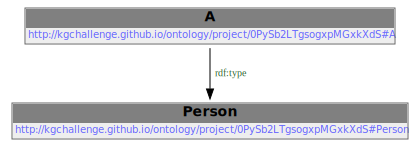

In [12]:
from utils import print_ttl
ttl = '''
:A a :Person.
'''

print_ttl(ttl)

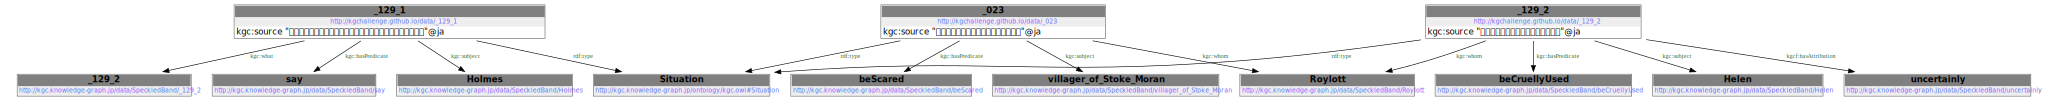

In [13]:
print_ttl(f'{additional_knowledge_graph_dir}/additional_situation.ttl')